 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [5]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [6]:
# Reading whale returns
whales_df = pd.read_csv('C:\\Users\\Gino\\OneDrive\\Desktop\\Module 4 Challenge\\Starter_Code\\Resources\\whale_returns.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)

# whales_df

In [7]:
# Count nulls
whales_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [8]:
# Drop nulls
whales_ret = whales_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [9]:
# Reading algorithmic returns
algoret = pd.read_csv('C:\\Users\\Gino\\OneDrive\\Desktop\\Module 4 Challenge\\Starter_Code\\Resources\\algo_returns.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)

In [10]:
# Count nulls
algoret.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop nulls
algoret = algoret.dropna()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500 = pd.read_csv(
    'C:\\Users\\Gino\\OneDrive\\Desktop\\Module 4 Challenge\\Starter_Code\\Resources\\sp500_history.csv',
      index_col =  "Date", 
      infer_datetime_format = True, 
      parse_dates = True
)
pd.DataFrame(sp500)

#sp500["Close"]

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [13]:
# Check Data Type
sp500.dtypes

Close    object
dtype: object

In [14]:
# Fix Data Types
sp500.dtypes
sp500['Close'] = sp500['Close'].str.replace('$', '', regex = False).astype(float)

# fdf_sp500 = sp500['Close'].str.replace('$', '')
# fdf_sp500
# sp500c = sp500['Close'].astype(float)
#sp500cl = sp500['Close'].str.replace('$', ' ')
#date_sp500 = sp500.int('Date')
# sp500['Date']= sp500['Close']
# sp500['Date'] = sp500['Date'].astype('float')

In [15]:
# Calculate Daily Returns
sp500 = sp500.pct_change()

# fdf_sp500['Date'].astype(int)
# sp500['Close']
# for i in sp500['Close']:
#     i.

In [16]:
# Drop nulls
sp500 = sp500.dropna().copy()

In [17]:
# Rename `Close` Column to be specific to this portfolio.
sp500 = sp500.rename(columns = {'Close' : 'S&P 500 Daily Return'})

#sp500ret2 = sp500ret['Close'].rename('S&P 500 Daily Return').to_frame()
#sp500ret2
# new_sp500c_df = new_sp500c.to_frame()
# new_sp500c_df

## Combine Whale, Algorithmic, and S&P 500 Returns

In [18]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whales_ret, algoret, sp500],axis = 1, join="inner").dropna()

# combined_df = pd.concat([whales_df, c_algoret, new_sp500c_df])
# combined_df.dropna()
# combined_df = []
# combined_df.concat(whales_df, c_algoret, new_sp500c_df)

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

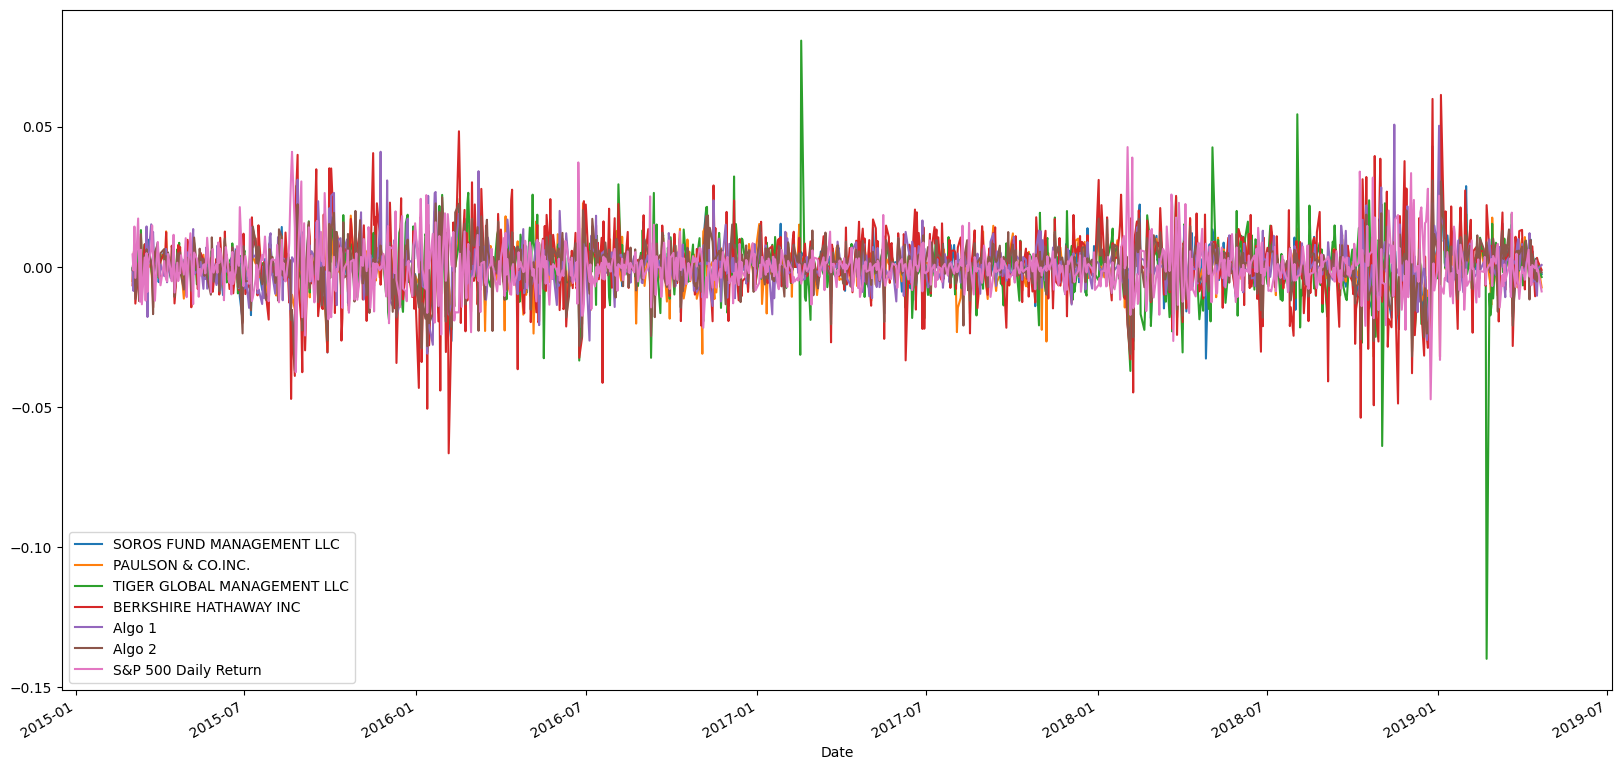

In [19]:
# Plot daily returns of all portfolios
combined_df.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

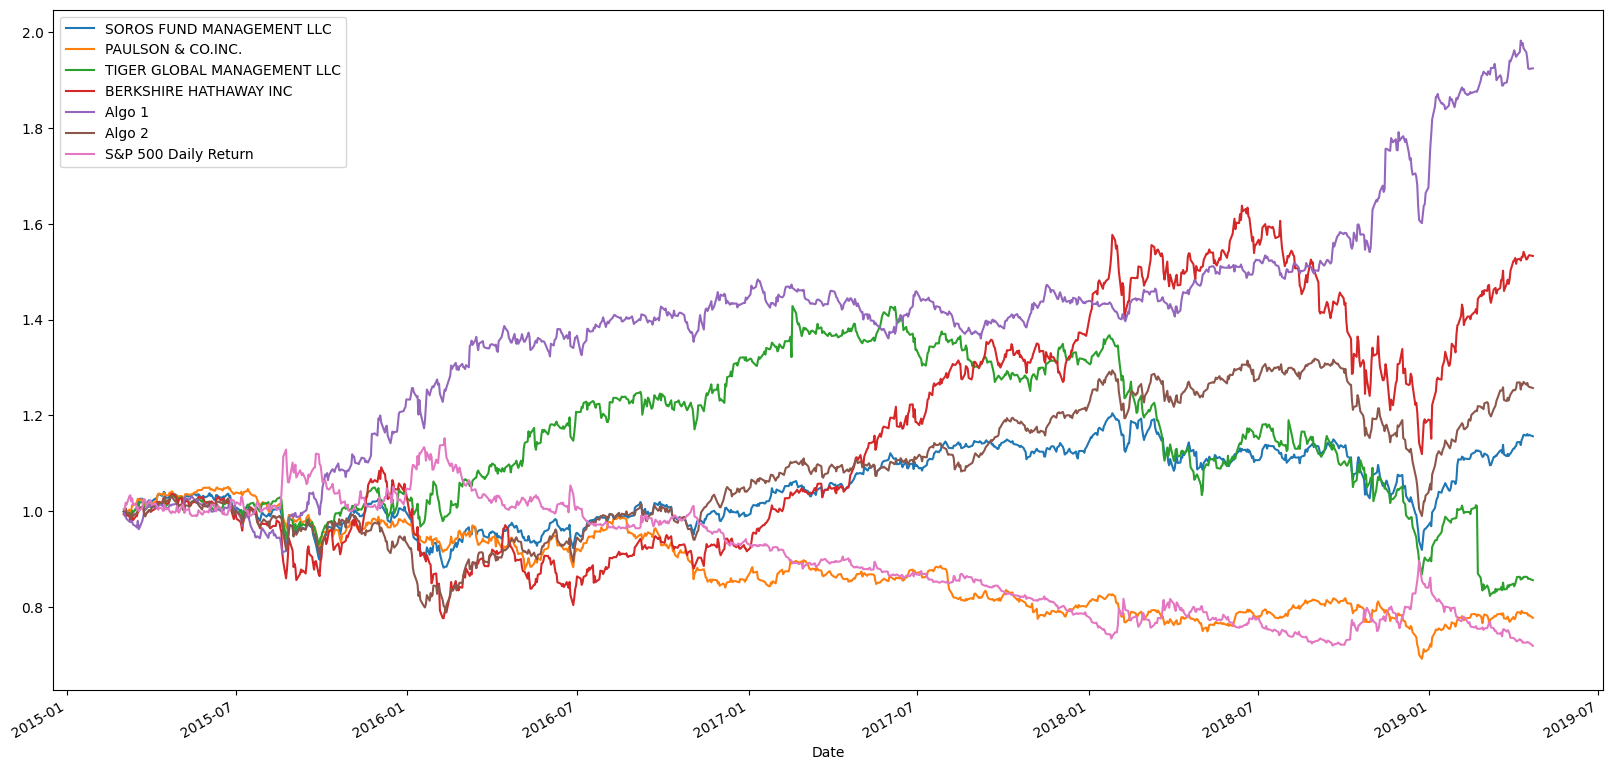

In [20]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize = (20, 10))
#combined_df.dtypes
# combined_df(axis = 1).cumprod()

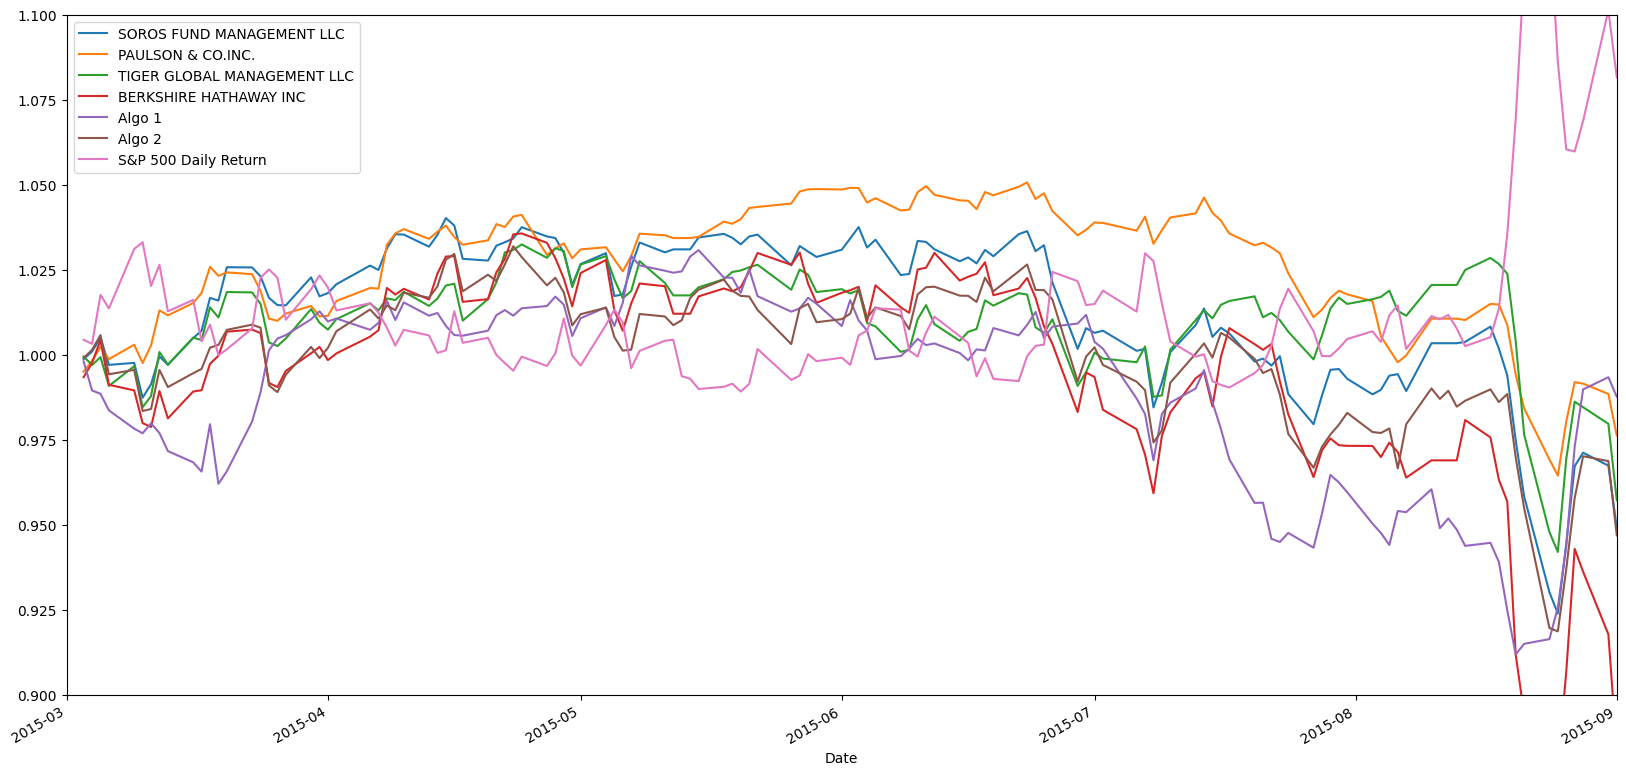

In [21]:
# Extra - Zooming in to see how the portfolios correlated with each other at the begining of our data set
cumulative_returns.plot(figsize = (20, 10))
plt.xlim('2015-03', '2015-09')  
plt.ylim(.9, 1.1)
plt.show()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

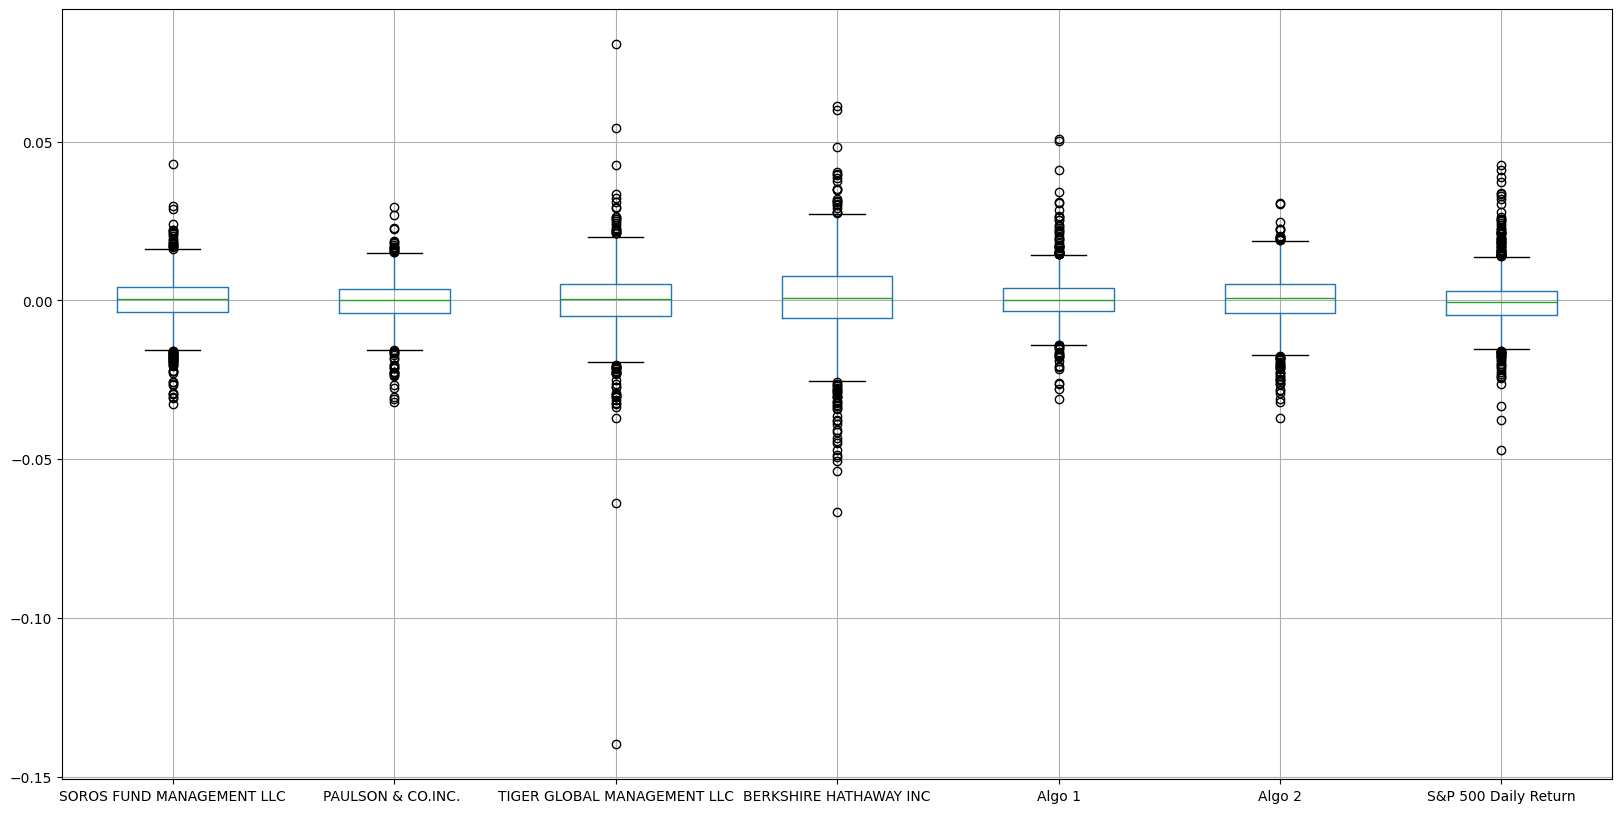

In [22]:
# Box plot to visually show risk
combined_df.boxplot(figsize = (20,10))

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviations of all portfolios
dd_combined_df = combined_df.std()

# dd_combined_df = combined_df.pct_change().rolling(window = "D").std()#*(252**0.5)
# print(dd_combined_df)
# dd_sp = new_sp500c_df.pct_change().rolling(window = "D").std()*(252 ** 0.5)
# dd_sp = new_sp500c_df["S&P 500 Daily Return"].std()
# dd_sp

### Determine which portfolios are riskier than the S&P 500

In [24]:
# Calculate the daily standard deviation of S&P 500
dd_sp500 = sp500['S&P 500 Daily Return'].std()
print(dd_sp500)

# Determine which portfolios are riskier than the S&P 500
risky = []
less_risky = []
for column, std_dev in combined_df.std().items():
    if std_dev > dd_sp500:
        less_risky.append(column)
    elif std_dev < dd_sp500:
        risky.append(column)
print(risky)
print(less_risky)

# dd_sp500ret = sp500ret.std()
# print(dd_sp500ret)
# dd_sp = new_sp500c_df["S&P 500 Daily Return"].std()
# dd_sp
# for x in combined_df.std():
#     if x > dd_sp500ret:
#         x.append[less_risk]
#     elif x < dd_sp500ret:
#         x.append[risky]
#     else: False
    

0.008134642617809523
['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'Algo 1']
['TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 2', 'S&P 500 Daily Return']


### Calculate the Annualized Standard Deviation

In [25]:
# Calculate the annualized standard deviation (252 trading days)
anstnd_combined_df = combined_df.std() * (252 ** .05)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

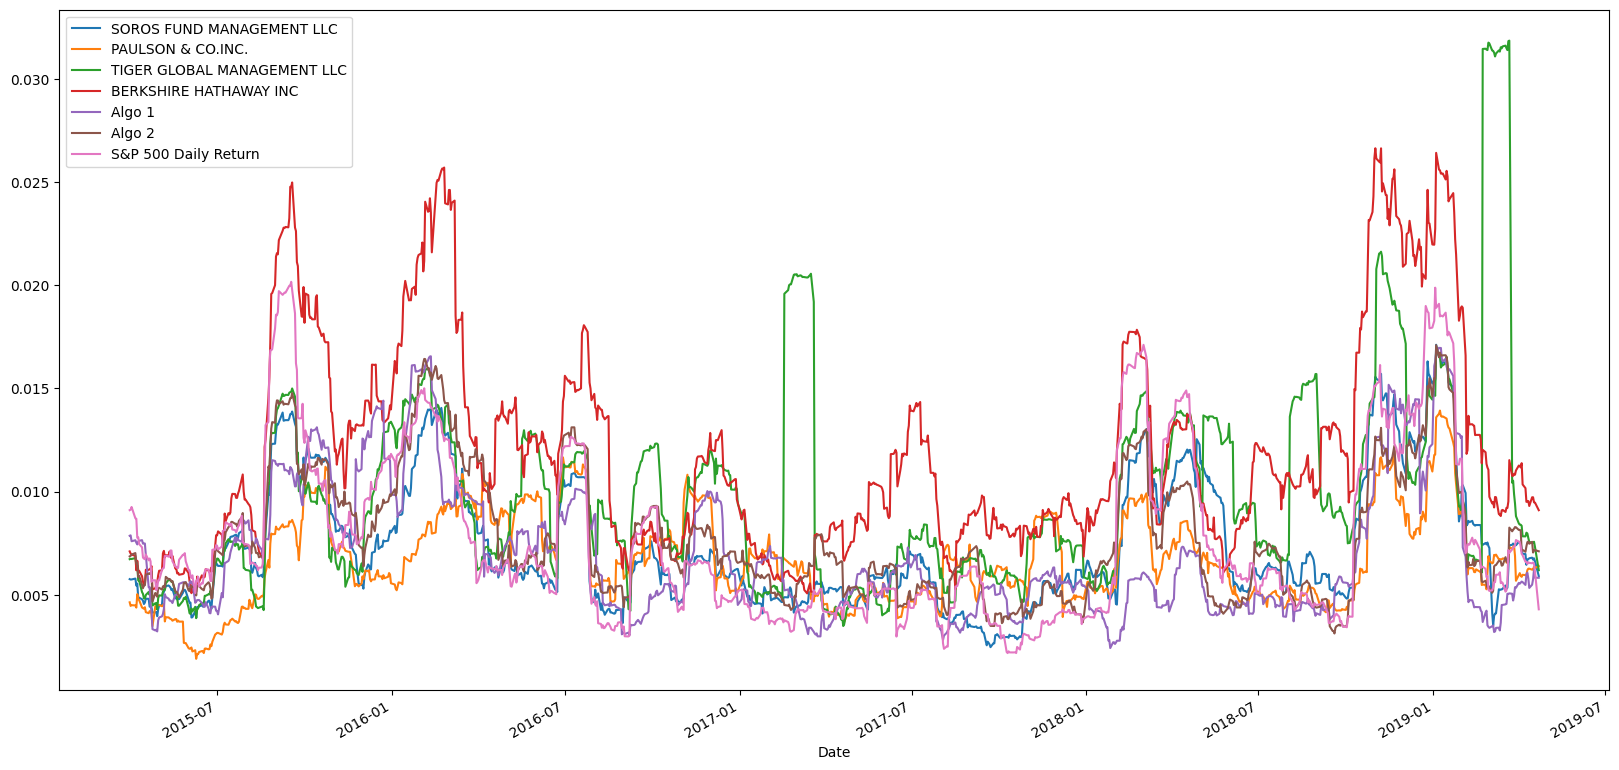

In [26]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rollstnd_combined_df = combined_df.rolling(window=21).std().dropna()

# Plot the rolling standard deviation
rollstnd_combined_df.plot(figsize= (20,10))

### Calculate and plot the correlation

<Axes: >

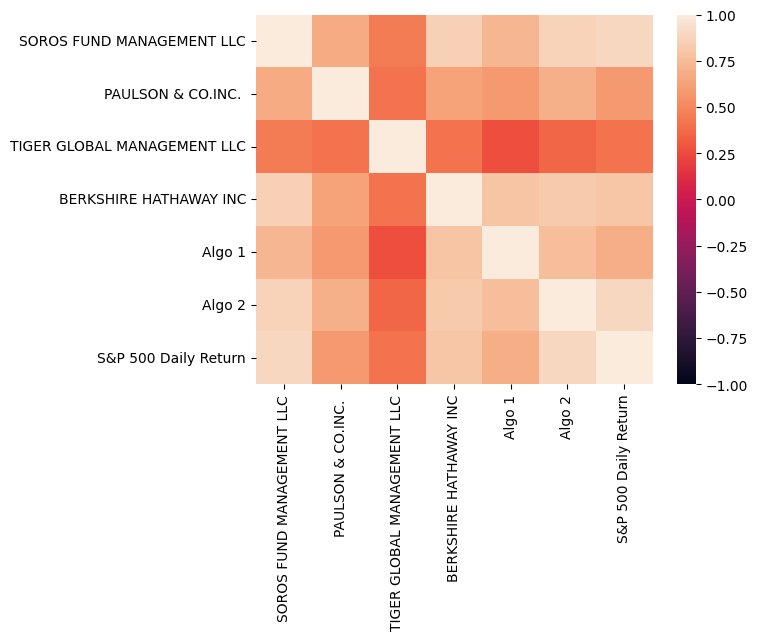

In [27]:
# Calculate the correlation
corr_rollstnd_combined_df = rollstnd_combined_df.corr()
# Display de correlation matrix
sns.heatmap(corr_rollstnd_combined_df,vmin = -1, vmax = 1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: xlabel='Date'>

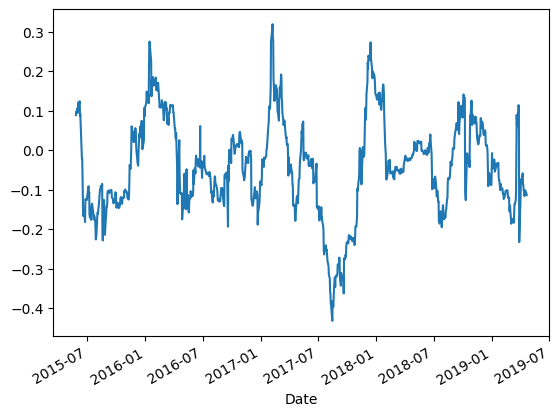

In [28]:
# Calculate covariance of a single portfolio
cov = combined_df['Algo 1'].rolling(window = 60).cov(combined_df["S&P 500 Daily Return"])
# Calculate variance of S&P 500
var = combined_df["S&P 500 Daily Return"].rolling(window = 60).var()
# Computing beta
beta = (cov / var)
# Plot beta trend
beta.plot()

# cov_algoret = algoret.cov()
# print(cov_algoret)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

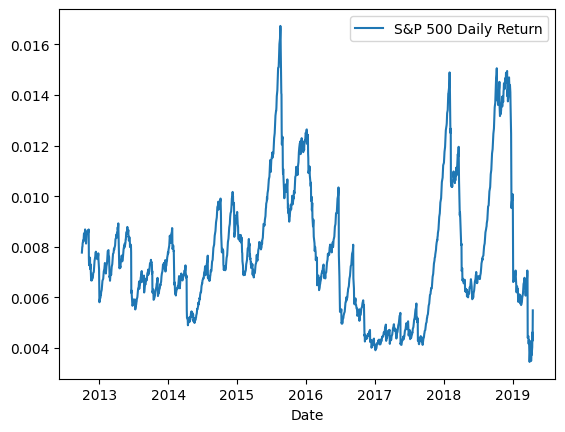

In [29]:
# Use `ewm` to calculate the rolling window
ewm = sp500.ewm(halflife = 21).std().dropna()
# print(sns.lineplot(x=ewm.index, y=ewm['S&P 500 Daily Return']))

sns.lineplot(ewm)

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [30]:
# Annualized Sharpe Ratios
annualizedsr = combined_df.mean() * 252 / (combined_df.std() * np.sqrt(252))
annualizedsr = annualizedsr.to_frame()
annualizedsr = annualizedsr.rename(columns = {"0" : "Sharpe Ratio"})

# sharpe_ratio = (avg_ret - riskfreerate) / s_d
# s_d = combined_df['S&P 500 Daily Return'].std()
# annualizedsr = (dd_combined_df - .10) / (** .05)
# annualizedsr
# riskfreerate = combined_df['Algo 1'].pct_change().std()
# avg_ret = combined_df['S&P 500 Daily Return'].mean()
# sharpe_ratio = (avg_ret - riskfreerate) / s_d
# sharpe_ratio

<Axes: >

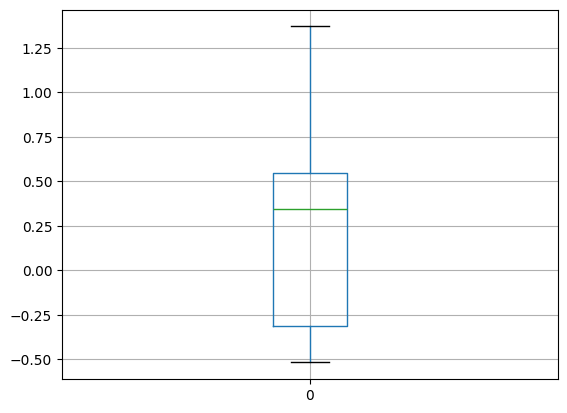

In [31]:
# Visualize the sharpe ratios as a bar plot
annualizedsr.boxplot()

#annualizedsr.boxplot(figsize = (15, 10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [33]:
# Reading data from 1st stock
path1 = pd.read_csv(
    "C:\\Users\\Gino\\OneDrive\\Desktop\\Module 4 Challenge\\Starter_Code\\Resources\\aapl_historical.csv",
    index_col = "Trade DATE",
    infer_datetime_format = True,
    parse_dates = True
    )

In [34]:
# Reading data from 2nd stock
path2 = pd.read_csv(
    "C:\\Users\\Gino\\OneDrive\\Desktop\\Module 4 Challenge\\Starter_Code\\Resources\\goog_historical.csv",
      index_col="Trade DATE",
      infer_datetime_format=True, 
      parse_dates=True
      )

In [35]:
# Reading data from 3rd stock
path3 = pd.read_csv(
    "C:\\Users\\Gino\\OneDrive\\Desktop\\Module 4 Challenge\\Starter_Code\\Resources\\cost_historical.csv",
    index_col="Trade DATE",
    infer_datetime_format=True, 
    parse_dates=True
    )

In [36]:
# Reorganize portfolio data by having a column per symbol
path1 = path1.rename(columns={'NOCP' : 'AAPL'}).drop(columns = "Symbol")
path2 = path2.rename(columns={'NOCP' : 'GOOG'}).drop(columns = "Symbol")
path3 = path3.rename(columns={'NOCP' : 'COST'}).drop(columns = "Symbol")

In [37]:
# Combine all stocks in a single DataFrame
challenge_df = pd.concat([path1, path2, path3], join = 'inner', axis = 1)

In [38]:
# Reset Date index
#challenge_df = challenge_df.reset_index()
challenge_df = challenge_df.rename(columns = {'Trade DATE' : 'Date'})

In [39]:
# Calculate daily returns
challenge_df = challenge_df[["AAPL", "GOOG", "COST"]].pct_change()
# # Drop NAs
challenge_df = challenge_df.dropna()
# Display sample data
challenge_df.head()

,AAPL,GOOG,COST
Trade DATE,,,
2019-05-08,0.010861,0.003347,-0.008749
2019-05-07,-0.000197,0.006714,-0.004806
2019-05-06,0.027704,0.013023,0.016862
2019-05-03,0.015685,-0.003355,0.001597
2019-05-02,-0.012279,-0.019226,-0.007890


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<Axes: xlabel='Trade DATE'>

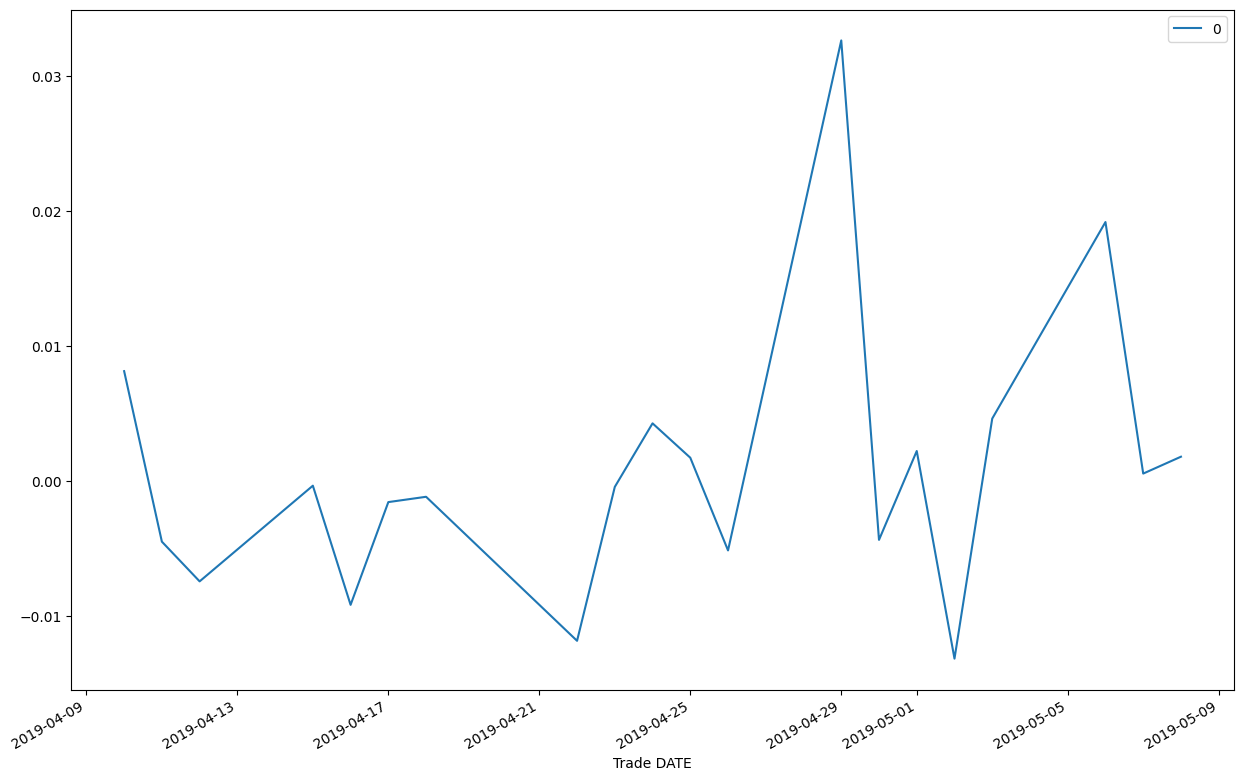

In [40]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = pd.DataFrame(challenge_df.dot(weights))

# Display sample data 
portfolio_returns.head(20).plot(figsize = (15,10))

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [41]:
# Join your returns DataFrame to the original returns DataFrame
challenge_df = pd.concat([portfolio_returns, challenge_df], axis = 1, join = "inner")
#ri_challenge_df = ri_challenge_df.rename(columns = {'O' : 'Portfolio Returns'})

In [42]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
challenge_df = challenge_df.dropna().rename(columns = { 0 : "Portfolio Returns"})

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [43]:
# Calculate the annualized `std`
annual_std = portfolio_returns.std() * (252 ** .05)

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Trade DATE'>

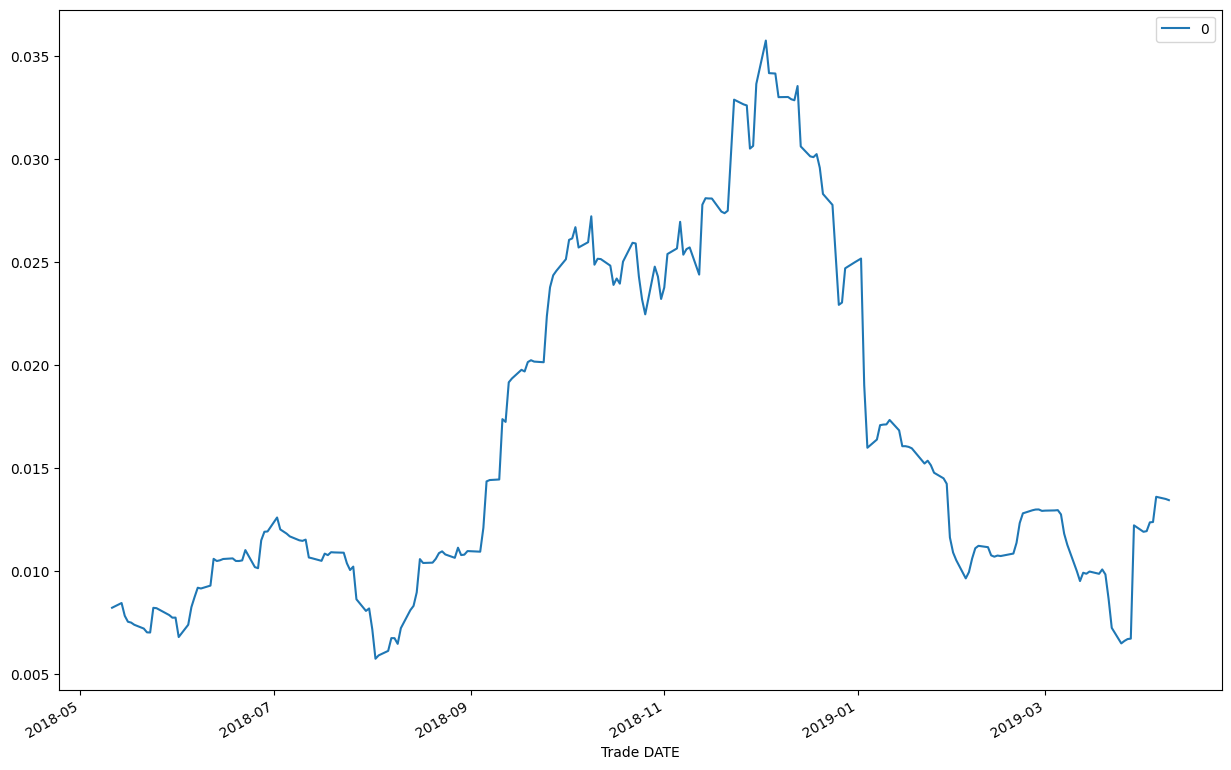

In [44]:
# Calculate rolling standard deviation
rolling_std = portfolio_returns.rolling(window = 21).std() * (252 ** .05)
# Plot rolling standard deviation
rolling_std.plot(figsize = (15,10))

### Calculate and plot the correlation

<Axes: >

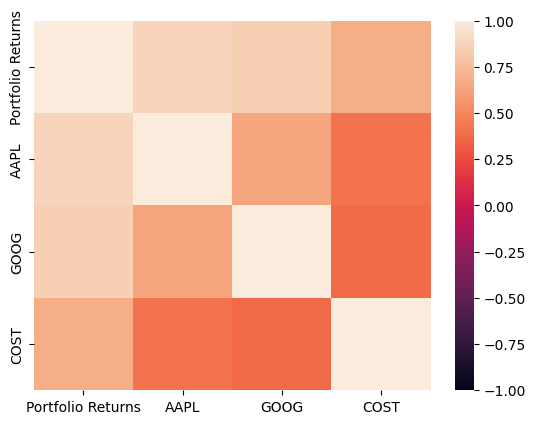

In [45]:
# Calculate and plot the correlation
corr = challenge_df.corr()
sns.heatmap(corr, vmin = -1, vmax = 1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: >

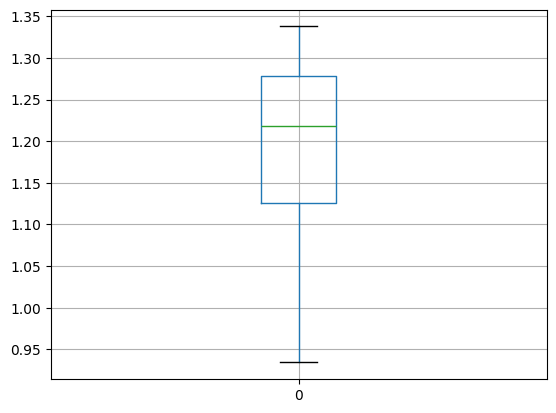

In [46]:
# Calculate and plot Beta
cov = challenge_df["Portfolio Returns"
                      ].rolling(window = 60
                                ).cov(combined_df["S&P 500 Daily Return"
                                                  ]).dropna()
var = combined_df["S&P 500 Daily Return"
                  ].rolling(window = 60
                            ).var()
# Computing beta
beta = (cov / var)
beta = pd.DataFrame(beta)
# Plot beta trend
beta.boxplot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Calculate Annualized Sharpe Ratios
a_sharpe_ratio = (challenge_df.mean() * 252) / (challenge_df.std() * np.sqrt(252))
a_sharpe_ratio = pd.DataFrame(a_sharpe_ratio)
a_sharpe_ratio = a_sharpe_ratio.rename(columns = {0 : 'Sharpe Ratio'})

<Axes: >

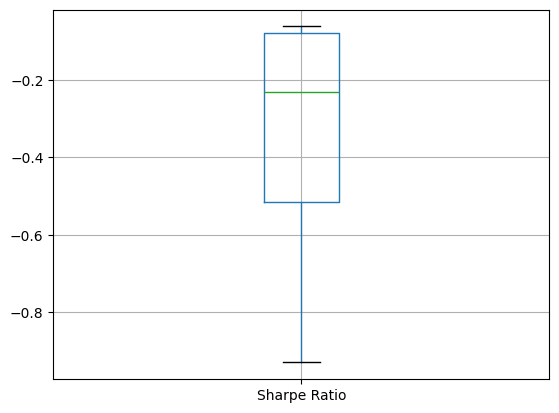

In [48]:
# Visualize the sharpe ratios as a bar plot
a_sharpe_ratio.boxplot()

### How does your portfolio do?

 It appears to be that with my calculating of the sharpe ratio of my portfolio, it appears to be that the portfolio would have had higher risk being that the portfolio was likely to move approximately - 0.22% per the movement of the S&P500